In [11]:
from astropy.io import fits
from astropy.table import Table
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import pandas as pd

def plot_label_one_to_one(label_df, label, validation_str):
    x = label_df['{}_{}'.format(validation_str, label)]
    y = label_df['cannon_{}'.format(label)]
    z = label_df['rvs_spec_sig_to_noise']
    diff = y - x
    bias = np.round(np.nanmean(diff), 3)
    rms = np.round(np.sqrt(np.nansum(diff**2)/np.sum(np.isfinite(diff))), 3)
    subplot_label = 'bias, rms = {}, {}'.format(bias, rms)
    plt.scatter(x, y, c=z, vmin=100,vmax=700, s=10, cmap='viridis_r')
    plt.plot([], [], '.', color='w', label=subplot_label)
    plt.xlabel('SPOCS {}'.format(label));plt.ylabel('Cannon {}'.format(label))
    plt.plot([x.min(), x.max()], [x.min(), x.max()], lw=0.7, color='lightgrey')
    plt.legend(loc='upper left', frameon=False, labelcolor='tomato')
    plt.colorbar(label='RVS spectrum SNR')

def plot_label_difference(label_df, label, validation_str):
    x = label_df['{}_{}'.format(validation_str, label)]
    y = label_df['cannon_{}'.format(label)]
    diff = y - x
    plt.hist(diff, histtype='step', color='k')
    plt.xlabel(r'$\Delta {}$'.format(label))

In [12]:
def plot_one_to_one(label_df, validation_str, figure_path=None):
    markersize=1;alpha_value=0.5
    full_labels = ['teff', 'logg','feh', 'alpha', 'vbroad']
    labels_to_plot = [i for i in full_labels if i!='alpha']

    # define axis limits
    axis_limit_values = [(4500,7000), (3,5.5), (-1,1), (0,30)]
    axis_limit_dict = dict(zip(labels_to_plot, axis_limit_values))

    gs = gridspec.GridSpec(5, 2, width_ratios=[1.2, 1])
    plt.figure(figsize=(10,17))
    for i in range(len(labels_to_plot)):
        plt.subplot(gs[2*i])
        label = labels_to_plot[i]
        axis_min, axis_max = axis_limit_dict[label]
        plt.plot([axis_min, axis_max], [axis_min, axis_max], lw=0.7, color='lightgrey')
        plt.xlim(axis_min, axis_max)
        plt.ylim(axis_min, axis_max)
        plot_label_one_to_one(label_df, label, validation_str)
        plt.subplot(gs[2*i+1])
        plot_label_difference(label_df, label, validation_str)

    if figure_path is not None:
        plt.savefig(figure_path, dpi=300, bbox_inches='tight')
        

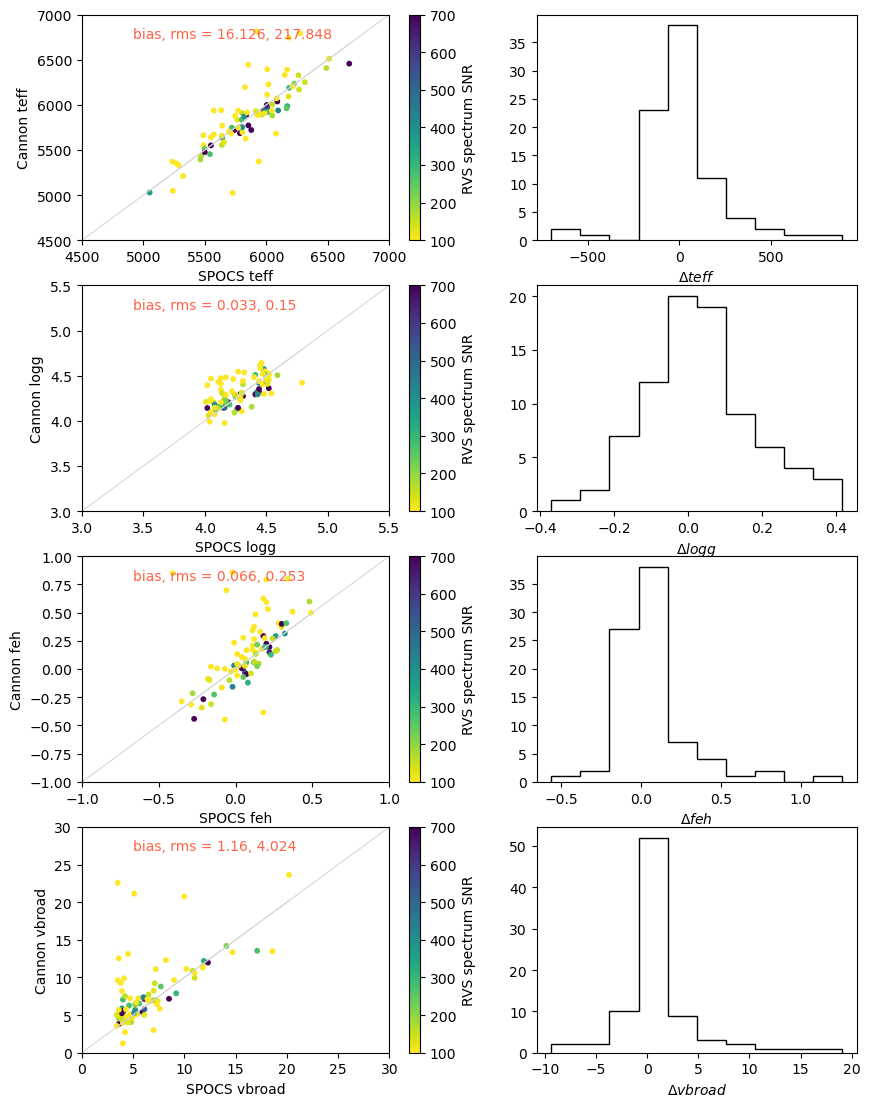

In [13]:
spocs_label_df = pd.read_csv('../data/label_dataframes/spocs_cannon_labels.csv')
plot_one_to_one(spocs_label_df, 'spocs')